# **OCR Packages Installation**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ls
%cd gdrive/MyDrive/OCR/

gdrive	sample_data
/content/gdrive/MyDrive/OCR


In [4]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 37 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 3s (1,762 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl

# **Importing Libraries**

In [26]:
import pytesseract
import shutil
import os
import cv2
import random
from google.colab.patches import cv2_imshow
try:
 from PIL import Image
except ImportError:
 import Image

# **Tesseract Action**

In [47]:
#tessract action
def tesseract_action(img, text_class):
  # cv2_to_PIl
  image = Image.fromarray(img)

  # Text extraction
  extractedInformation = pytesseract.image_to_string(image)

  # class and its text
  print(text_class, ": ", extractedInformation)
  print("---------------**------------------\n")

# **Image Processing**

In [43]:
# image processing
def image_process(crop_img, name_class):
  # Grey convertion
  gray = cv2.cvtColor(crop_img, cv2.COLOR_BGR2GRAY)

  # Performing OTSU threshold
  ret, thresh1 = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY |cv2.THRESH_OTSU)
  print("\nProcessed image")
  cv2_imshow(thresh1)

  tesseract_action(thresh1, name_class)

# **Image Cropping**

In [42]:

# Image croping  
def image_crop(bound_box, img_name):
  b_box_no = len(bound_box)
  for box in bound_box:
    x_min, y_min, x_max, y_max, class_name = box
    crop_image = img_name[y_min:y_max, x_min:x_max]
    print("Coord&class: ", x_min, y_min, x_max, y_max, class_name,"\n")
    print("Crop_image")
    cv2_imshow(crop_image)
    image_process(crop_image, class_name)
  print(b_box_no)

In [8]:
# %cd /content/gdrive/MyDrive/OCR/
!ls

/content/gdrive/MyDrive/OCR
0000337130.png


# **Testing with Existing Data**

Coord&class:  145 45 413 126 company_name 

Crop_image


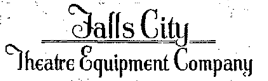


Processed image


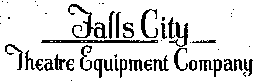

company_name :  alls City

Sheatre Squipment Company

---------------**------------------

Coord&class:  420 163 629 199 date 

Crop_image


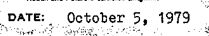


Processed image


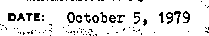

date :   

---------------**------------------

Coord&class:  442 21 624 56 invoice_no 

Crop_image


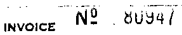


Processed image


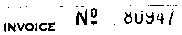

invoice_no :  "No _
invoice NP . BUsa/

---------------**------------------

Coord&class:  540 507 673 536 amound 

Crop_image



Processed image


amound :  | | 830704.

---------------**------------------

4


In [48]:
b_box = [[145, 45, 413, 126, "company_name"], [420, 163, 629, 199, "date"], [442, 21, 624, 56, "invoice_no"], [540, 507, 673, 536, "amound"]]
img_new = cv2.imread("0000337130.png")

image_crop(b_box, img_new)